In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

cancer_data = pd.read_csv('cancer_data.csv')
cancer_data = cancer_data.drop(columns = ['Unnamed: 0'])
cancer_data.head()

,diagnosis,children,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,Yes,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,No,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,Yes,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,No,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,Yes,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


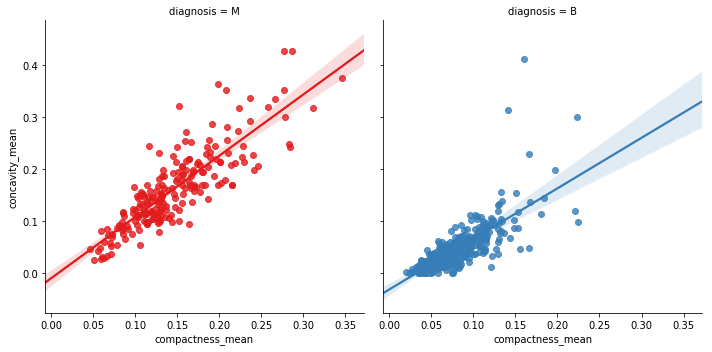

In [53]:
#Plot of concavity_mean vs. compactness_mean, hue on diagnosis
import seaborn as sns
sns.lmplot(x='compactness_mean',y='concavity_mean',data= cancer_data, hue = 'diagnosis', palette="Set1", col = "diagnosis")

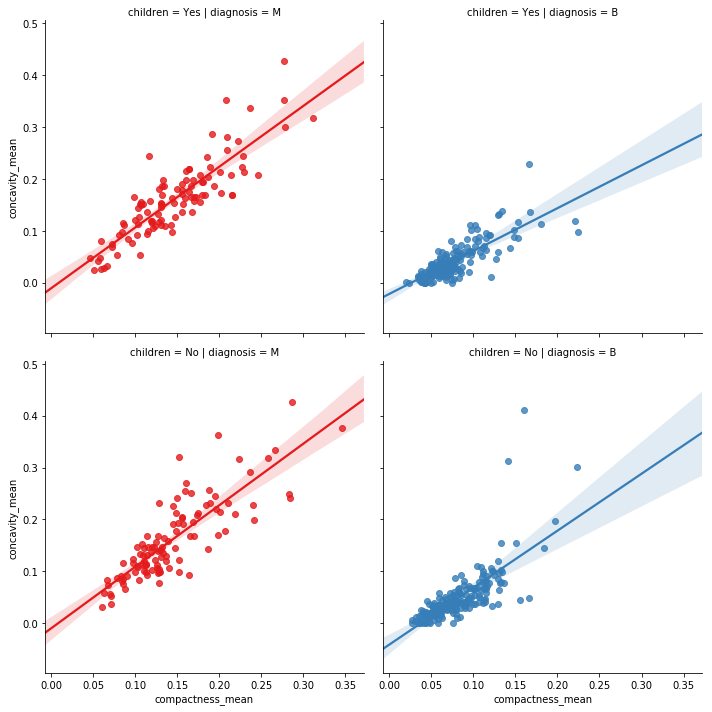

In [68]:
#Plot of concavity_mean vs. compactness_mean, hue on diagnosis, children

sns.lmplot(x='compactness_mean',y='concavity_mean',data= cancer_data, hue = 'diagnosis', palette="Set1", 
         col = "diagnosis", row = "children")

# SIMPLE LINEAR REGRESSION MODEL

## Training and Testing Data


In [81]:
#Predicting the radius_mean based on the compactness_mean, concavity_mean and concave points_mean
# Importing the dataset
X = cancer_data.iloc[:, 7:8].values #compactness_mean
y = cancer_data.iloc[:, 8].values #concavity_mean


In [82]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [94]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train) #R^2 value

0.8005644524173792

In [84]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)


** Create a scatterplot of the real test values versus the predicted values. **

Text(0,0.5,'Predicted Y')

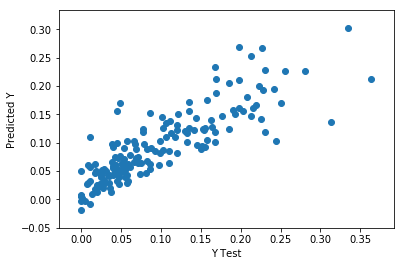

In [85]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [86]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.028270587937021092
MSE: 0.0016239461214460889
RMSE: 0.04029821486674179


### Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

C:\Users\JFP1141\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


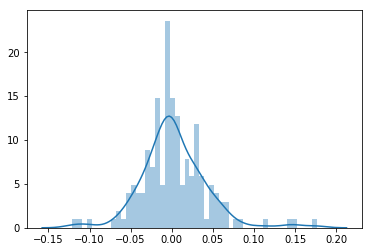

In [87]:
sns.distplot((y_test-y_pred),bins=50);

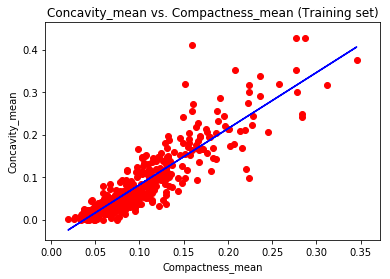

In [92]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Concavity_mean vs. Compactness_mean (Training set)')
plt.xlabel('Compactness_mean')
plt.ylabel('Concavity_mean')
plt.show()

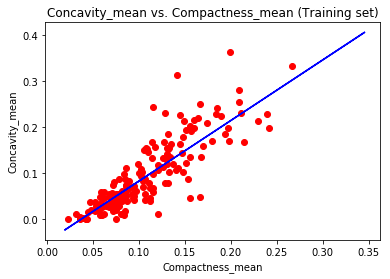

In [95]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Concavity_mean vs. Compactness_mean (Training set)')
plt.xlabel('Compactness_mean')
plt.ylabel('Concavity_mean')
plt.show()

# Multiple Linear Regression

In [122]:

# Importing the dataset
X = cancer_data.iloc[:, [1,3,4,5,6,7,8,9]].values #Values from column 1 to 9
y = cancer_data.iloc[:, 2].values #radius_mean



In [123]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()
X


array([[ 0.     ,  1.     , 10.38   , ...,  0.2776 ,  0.3001 ,  0.1471 ],
       [ 1.     ,  0.     , 17.77   , ...,  0.07864,  0.0869 ,  0.07017],
       [ 0.     ,  1.     , 21.25   , ...,  0.1599 ,  0.1974 ,  0.1279 ],
       ...,
       [ 0.     ,  1.     , 28.08   , ...,  0.1023 ,  0.09251,  0.05302],
       [ 0.     ,  1.     , 29.33   , ...,  0.277  ,  0.3514 ,  0.152  ],
       [ 1.     ,  0.     , 24.54   , ...,  0.04362,  0.     ,  0.     ]])

In [124]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [132]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
regressor.score(X_train, y_train) #R^2 value

0.999433739123187

Text(0,0.5,'Predicted Y')

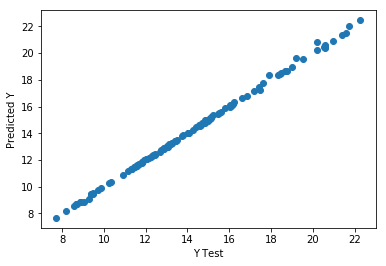

In [127]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [128]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.059203214480658815
MSE: 0.012002664078764111
RMSE: 0.1095566706265032


C:\Users\JFP1141\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


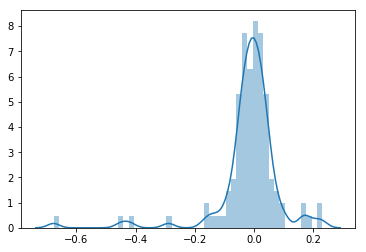

In [129]:
sns.distplot((y_test-y_pred),bins=50);

0.999433739123187